# Assignment 3 - Visualization

Freek van Geffen | s2633256 <br>
Justin Kraaijenbrink | s2577984

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding

## Visualizations

#### Import data and define helper functions

In [2]:
import os
path = os.getcwd()

gene_proteins = pd.read_csv(path+'/data/PAM50_proteins.csv')
clinical = pd.read_csv(path+'/data/clinical_data_breast_cancer.csv')
proteomes = pd.read_csv(path+'/data/77_cancer_proteomes_CPTAC_itraq.csv')

In [3]:
n = proteomes.index.values
proteomes_trans = proteomes.iloc[:,3:].T
TCGA_ids = pd.DataFrame({"Complete TCGA ID":proteomes_trans.index.values})
proteomes_trans.reset_index(inplace = True)
proteomes_trans.columns.values[0] = 'Complete TCGA ID'

In [4]:
def ReformatID(ID):
    
    x = ID[3:7]
    y = ID[0:2]
    out = 'TCGA'+'-'+y+'-'+ x
    
    return(out)

In [5]:
# Data preprocessing
proteomes_trans.iloc[:,0] = [ReformatID(element) for element in proteomes_trans.iloc[:,0]]
proteomes_final = proteomes_trans.dropna(axis = 1)
data = clinical.merge(proteomes_final, on = 'Complete TCGA ID')

objects = data.dtypes[data.dtypes == object].index.values
data_fact = data.copy(deep = True)

for i in objects:
    data_fact.loc[:, i] = pd.factorize(data_fact.loc[:, i])[0]

In [6]:
# Split predictors from outcome
y = data_fact['PAM50 mRNA']
X = data_fact.iloc[:, 30:]

#### PCA

In [7]:
# Standardize data
scaledX = StandardScaler().fit_transform(X)

In [8]:
# Perform PCA
pca = PCA(n_components = 2)

princomp = pca.fit_transform(scaledX)

pcaDf = pd.DataFrame(data = princomp,
                    columns = ['PC1', 'PC2'])
target = pd.DataFrame(y)

finalDf = pd.concat([pcaDf, target], axis = 1)

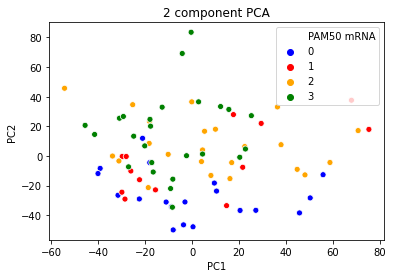

In [9]:
# Plot results
sns.scatterplot(x = "PC1", y = "PC2",
                    hue = "PAM50 mRNA",
                    palette = ['blue','red','orange','green'],
                    legend = 'full',
                    data = finalDf)
plt.title("2 component PCA")
plt.show()

#### LLE

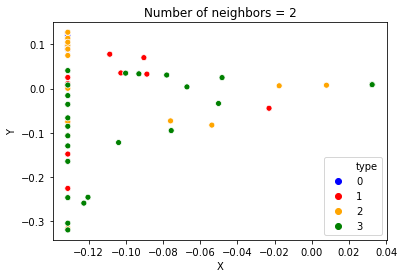

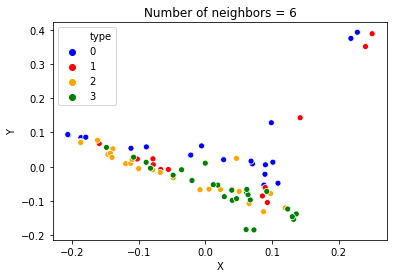

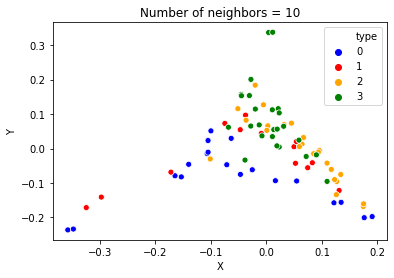

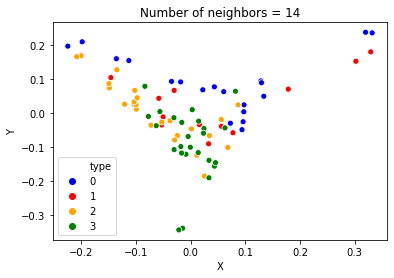

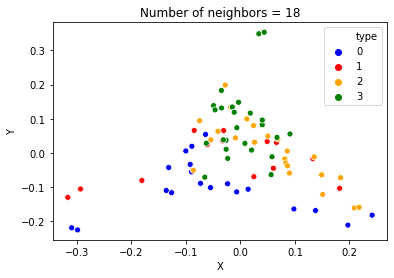

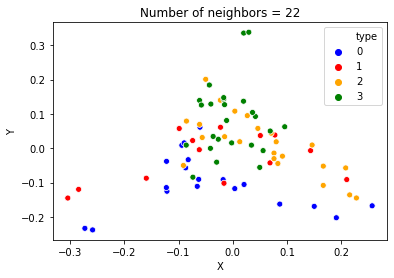

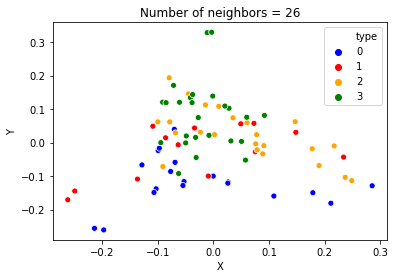

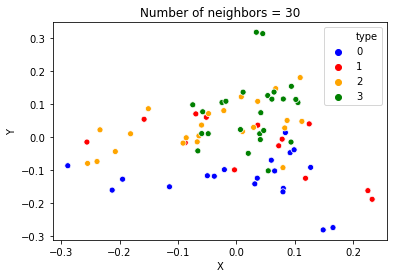

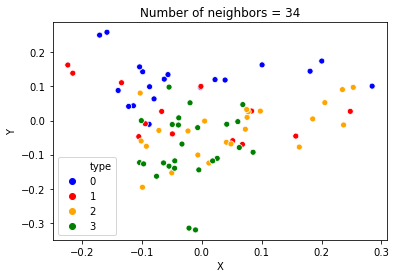

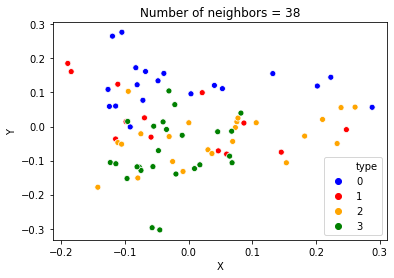

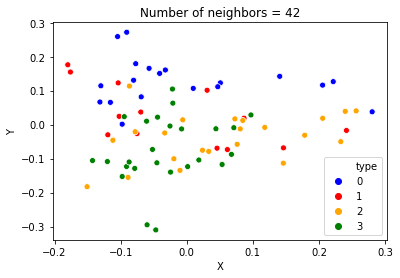

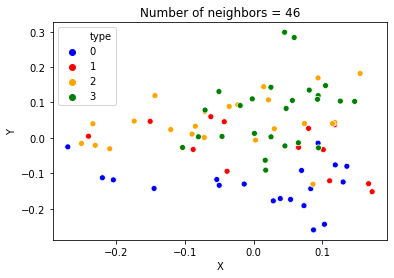

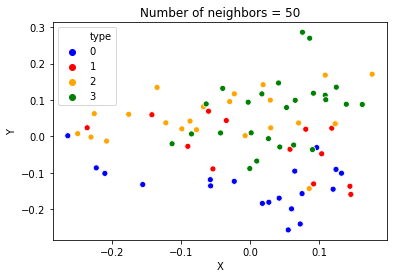

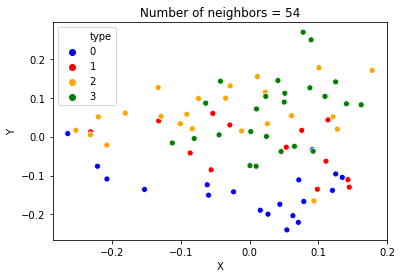

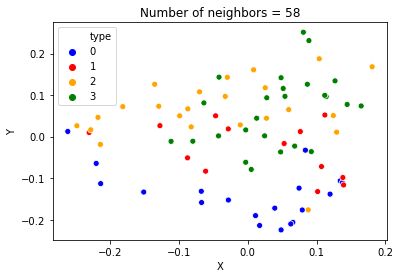

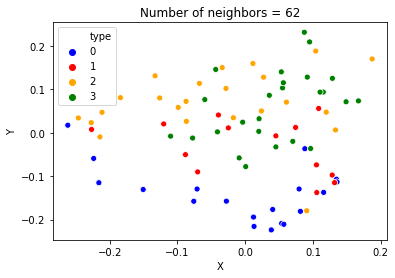

In [11]:
for i in range(2, 64, 4): #perplexity not higher than n_obs
    lle = LocallyLinearEmbedding(n_neighbors = i, 
                                 n_components = 2,
                                 reg = 0.01, 
                                 max_iter = 10000,
                                 random_state = 248, 
                                 n_jobs = -1)
    lle_obj= lle.fit_transform(X)
    lle_df = pd.DataFrame({'X' : lle_obj[:,0],
                           'Y' : lle_obj[:,1],
                           'type':y})

    sns.scatterplot(x = "X", y = "Y",
                    hue = "type",
                    palette = ['blue','red','orange','green'],
                    legend = 'full',
                    data = lle_df)
    n = str(i)
    plt.title("Number of neighbors = " + n)
    plt.show()

#### t-SNE

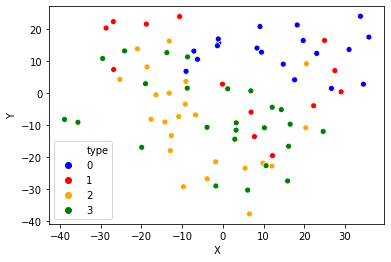

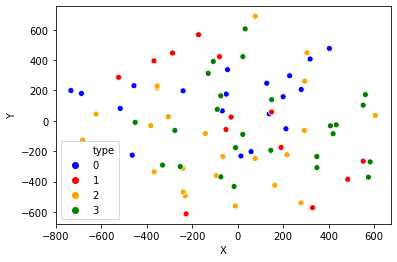

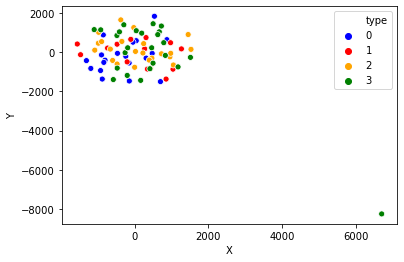

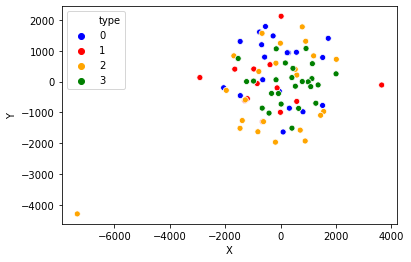

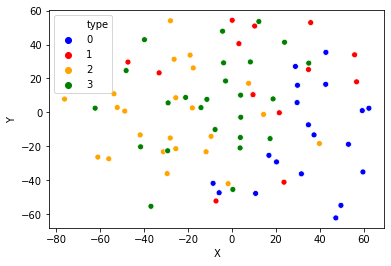

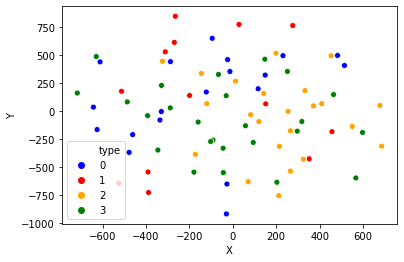

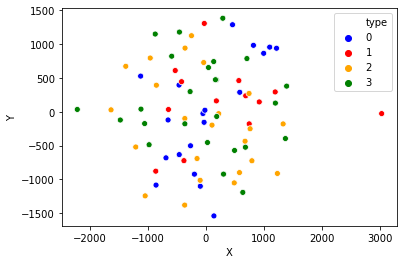

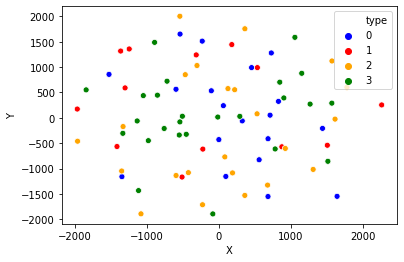

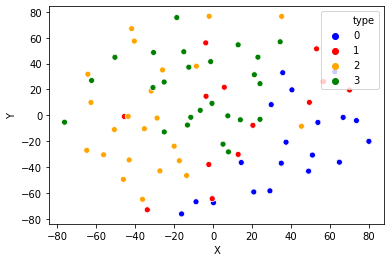

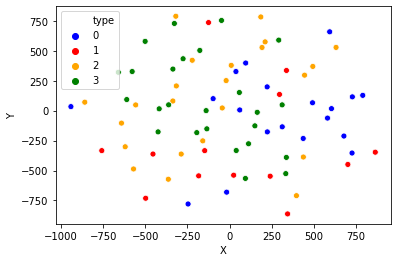

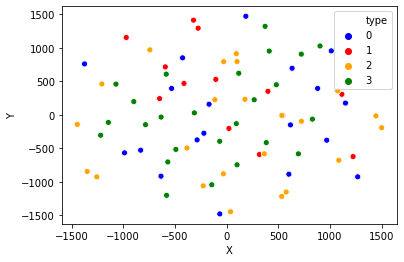

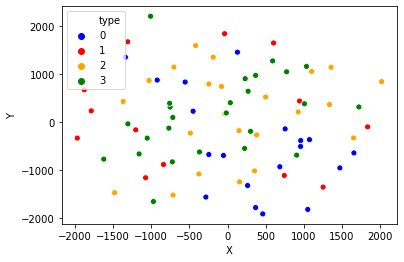

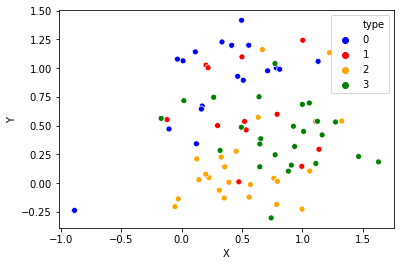

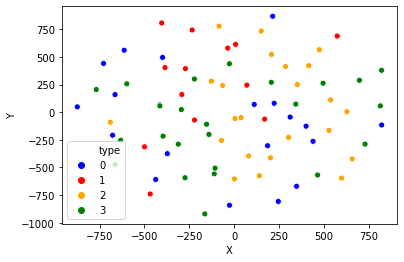

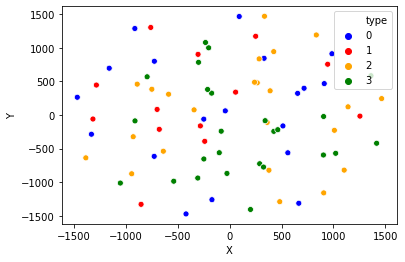

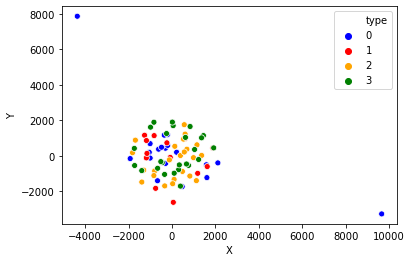

In [13]:
Perp = [15, 35, 55, 75]
lr = [10, 100, 500, 1000]
for p in Perp: #perplexity not higher than n_obs
    for l in lr:
        tsne = TSNE(n_components=3, random_state=248, perplexity = p, 
                n_iter = 10000, 
                n_iter_without_progress = 1000, 
                learning_rate = l)
        tsne_obj= tsne.fit_transform(X)
        tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'Z': tsne_obj[:,2],
                        'type':y})

        sns.scatterplot(x="X", y="Y",
              hue="type",
              palette=['blue','red','orange','green'],
              legend='full',
              data=tsne_df)
        fname = str(p) + str(l)
        plt.show()